In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
import quadrangle as qd

##### import all PubMed commented-commenting paits
df_all = pd.read_csv('/Users/shuangwang/Library/Mobile Documents/com~apple~CloudDocs/Desktop/PhD Projects/Research Commentary/Interesting_useful/Data/PubMed_Matched_data_220916.tsv', sep = '\t')
df_all['Create Date_art'] = pd.to_datetime(df_all['Create Date_art']).dt.date
df_all['Create Date_com'] = pd.to_datetime(df_all['Create Date_com']).dt.date



/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3172: DtypeWarning: Columns (12,20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
### Keep only pairs that comment time >= commented time
#.days:covert time-days-type to int,
df_all['Days_diff'] = (df_all['Create Date_com'] - df_all['Create Date_art']).dt.days
df_all = df_all[df_all['Days_diff'] >= 0].reset_index(drop = True)
df_all

,PMID_art,PMID_com,Pairing_type,Title_art,Publication Type_art,Journal/Book_art,Create Date_art,PMCID_art,First Author_art,Authors_art,...,First Author_com,Authors_com,Journal/Book_com,Create Date_com,PMCID_com,DOI_com,Abstract_com,Citation_com,Primary Research,Days_diff
0,30543192,31021323,both,Alagille syndrome: a case report.,"{'D002363': 'Case Reports', 'D016428': 'Journa...",Ann Biol Clin (Paris),2018-12-14,0,Benabed Y,Benabed Y; Chaillou E; Denis MC; Simard G; Rey...,...,Guillerme J,Guillerme J; Girot H; Quillard M; Brunel V,Ann Biol Clin (Paris),2019-04-26,0.0,10.1684/abc.2019.1437,0,"Guillerme J, <i>et al</i>. [Alagille syndrome,...",1,133
1,24051115,24447896,both,Transcranial magnetic stimulation and sleep di...,"{'D016428': 'Journal Article', 'D016454': 'Rev...",Sleep Med,2013-09-21,0,Nardone R,Nardone R; Höller Y; Brigo F; Tezzon F; Golasz...,...,Scalise A,Scalise A,Sleep Med,2014-01-23,0.0,10.1016/j.sleep.2013.12.004,0,Scalise A. The sleep lost. The sleep lost. 201...,1,124
2,24051115,24461371,both,Transcranial magnetic stimulation and sleep di...,"{'D016428': 'Journal Article', 'D016454': 'Rev...",Sleep Med,2013-09-21,0,Nardone R,Nardone R; Höller Y; Brigo F; Tezzon F; Golasz...,...,Nardone R,Nardone R; Kunz A; Höller Y; Trinka E; Brigo F,Sleep Med,2014-01-28,0.0,10.1016/j.sleep.2013.12.003,0,"Nardone R, <i>et al</i>. Response to, ""The sle...",1,129
3,33521713,33521714,both,Seroprevalence of SARS-CoV-2 in Hong Kong retu...,"{'D016422': 'Letter', 'D016420': 'Comment'}",Lancet Microbe,2021-02-01,PMC7834388,Hanage WP,Hanage WP; Vincent VI; Low NM,...,To KK,To KK; Yuen KY,Lancet Microbe,2021-02-01,7834862.0,10.1016/S2666-5247(20)30092-6,0,To KK and Yuen KY. Seroprevalence of SARS-CoV-...,0,0
4,26417971,26417972,both,Hybrid biliary interventions for Roux-en-Y ana...,"{'D016422': 'Letter', 'D016420': 'Comment'}",Endoscopy,2015-09-30,0,Kobiela J,Kobiela J; Hac S,...,Attam R,Attam R; Leslie D; Freeman ML; Ikramuddin S; A...,Endoscopy,2015-09-30,0.0,10.1055/s-0034-1392526,0,"Attam R, <i>et al</i>. Reply to Kobiela et al....",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102391,8044937,7586326,commenton_only,Increased secretion of tumor necrosis factor-a...,{'D016428': 'Journal Article'},Circulation,1994-08-01,0,Vaddi K,Vaddi K; Nicolini FA; Mehta P; Mehta JL,...,Schumacher M,Schumacher M; Eber B; Halwachs G; Fruhwald FM;...,Circulation,1995-12-01,0.0,0,0,"Schumacher M, <i>et al</i>. Dependence of solu...",1,487
1102392,28228602,29610749,commenton_only,<span>A divergent population of autoantigen-re...,"{'D016428': 'Journal Article', 'D013485': ""Res...",Sci Transl Med,2017-02-24,0,Heninger AK,Heninger AK; Eugster A; Kuehn D; Buettner F; K...,...,Schallenberg S,Schallenberg S; Kretschmer K,Ann Transl Med,2018-04-04,5879518.0,10.21037/atm.2017.12.14,0,Schallenberg S and Kretschmer K. New insight i...,1,404
1102393,28689154,29306570,commenton_only,"If a picture is worth a thousand words, take a...",{'D016428': 'Journal Article'},Cancer Epidemiol,2017-07-10,0,Morris E,Morris E; Treasure T,...,Fenwick SW,Fenwick SW; Poston GJ; Cameron IC; Huguet E; W...,Cancer Epidemiol,2018-01-08,0.0,10.1016/j.canep.2017.12.009,0,"Fenwick SW, <i>et al</i>. Re: E Morris, T Trea...",1,182
1102394,10823302,11202133,commenton_only,Systemic lupus erythematosus presenting as mania.,"{'D002363': 'Case Reports', 'D016428': 'Journa...",Acta Psychiatr Scand,2000-05-24,0,Khan S,Khan S; Haddad P; Montague L; Summerton C,...,Gerevich J,Gerevich J,Acta Psychiatr Scand,2001-02-24,0.0,0,0,Gerevich J. Compulsive heroin use: comorbidity...,1,276


In [3]:
### 1. total number of pairs
df_all.shape[0]

1102396

In [10]:
### 2. Descriptive results
art = len(set(df_all['PMID_art']))
com = len(set(df_all['PMID_com']))
print(f'1. total articles (commentin): {art}; total comments (commentin): {com}')

### total unique records
tot_rec = len(set(list(df_all['PMID_art']) + list(df_all['PMID_com'])))
print(f'2. total number of unique records: {tot_rec}')

### percentage of total unique records in all PubMed (34,837,504)
tot_pub = 34837504
com_per = round(tot_rec/tot_pub, 4)
print(f'3. Percentage of unique records in all PubMed: {com_per}')

1. total articles (commentin): 850268; total comments (commentin): 962674
2. total number of unique records: 1705040
3. Percentage of unique records in all PubMed: 0.0489


## Compute time incidence of Comments

In [15]:
df_date = pd.read_csv('/Users/shuangwang/Library/Mobile Documents/com~apple~CloudDocs/Desktop/PhD Projects/Research Commentary/Interesting_useful/Data/PubMed_artcom_edittime.tsv', sep = '\t')
df_date

,PMID_art,PMID_com,Journal/Book_art,Journal/Book_com,Create Date_art,Create Date_com,Days_diff,Editor_init_m5,Editor_init_m6,Editor_init_m7,Editor_init_m8,Editor_init_m9,Editor_init_m10,Editor_init_m11,Editor_init_m12,Editor_init_m1,Editor_init_m2,Editor_init_m3,Editor_init_m4
0,30543192,31021323,Ann Biol Clin (Paris),Ann Biol Clin (Paris),2018-12-14,2019-04-26,133,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
1,24051115,24447896,Sleep Med,Sleep Med,2013-09-21,2014-01-23,124,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
2,24051115,24461371,Sleep Med,Sleep Med,2013-09-21,2014-01-28,129,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
3,33521713,33521714,Lancet Microbe,Lancet Microbe,2021-02-01,2021-02-01,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,26417971,26417972,Endoscopy,Endoscopy,2015-09-30,2015-09-30,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102391,8044937,7586326,Circulation,Circulation,1994-08-01,1995-12-01,487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1102392,28228602,29610749,Sci Transl Med,Ann Transl Med,2017-02-24,2018-04-04,404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1102393,28689154,29306570,Cancer Epidemiol,Cancer Epidemiol,2017-07-10,2018-01-08,182,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
1102394,10823302,11202133,Acta Psychiatr Scand,Acta Psychiatr Scand,2000-05-24,2001-02-24,276,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN


In [17]:
#### 1) covert string to date type
#### 设定同期标准，此为30天
import scipy.stats as st
all_coms = df_date.shape[0]

times_dic0 = {}

days_port_sjr = {}
days_port_djr = {}
days_port_all = {}


for m, days in enumerate(range(30, 361, 30)):
    m = m + 1
    col = 'Editor_init_m' + str(m)
    edi_count = df_date[df_date[col] == 1].shape[0]
    noedi_count = df_date[df_date[col] == 2].shape[0]
    
    
    stime_count = (edi_count + noedi_count)
    
    edi_count_perc = edi_count/all_coms
    noedi_count_perc = noedi_count/all_coms
    stime_count_perc = stime_count/all_coms
    
    days_port_sjr[days] = edi_count_perc
    days_port_djr[days] = noedi_count_perc
    days_port_all[days] = stime_count_perc
    
    print(f'within（{days} days）Intra-journal: {edi_count}，Inter-journal: {noedi_count}')


within（30 days）Intra-journal: 353265，Inter-journal: 12911
within（60 days）Intra-journal: 436193，Inter-journal: 19819
within（90 days）Intra-journal: 511896，Inter-journal: 25426
within（120 days）Intra-journal: 589817，Inter-journal: 31358
within（150 days）Intra-journal: 657409，Inter-journal: 37262
within（180 days）Intra-journal: 715404，Inter-journal: 43060
within（210 days）Intra-journal: 770343，Inter-journal: 48391
within（240 days）Intra-journal: 812998，Inter-journal: 52880
within（270 days）Intra-journal: 850396，Inter-journal: 56616
within（300 days）Intra-journal: 879654，Inter-journal: 59719
within（330 days）Intra-journal: 903863，Inter-journal: 62322
within（360 days）Intra-journal: 921734，Inter-journal: 64458


## Construct a directed network

In [18]:
graph = nx.from_pandas_edgelist(df_all, source = 'PMID_com', target = 'PMID_art', create_using = nx.Graph())
### set node 'Primary Research' as attribute (type)
for ind, row in df_all.iterrows():
    graph.nodes[row['PMID_art']]['Type'] = row['Primary Research']
    graph.nodes[row['PMID_com']]['Type'] = 0
#print(graph.nodes(data = True))

In [4]:
nx.info(graph_di)

'MultiDiGraph with 1705040 nodes and 1102396 edges'

### Supplemental Note: Network structure features analysis in Subgraph

In [6]:
graph = nx.from_pandas_edgelist(df_all, source = 'PMID_com', target = 'PMID_art',
                                create_using = nx.Graph())

for ind, row in df_all.iterrows():
    graph.nodes[row['PMID_art']]['Type'] = row['Primary Research']
    graph.nodes[row['PMID_com']]['Type'] = 0

G0 = graph
c = dict(nx.clustering(G0))

############ 1. Calculate the average path length and clustering coefficient of each subgraph
nodes_subg_dic = {}
edges_subg_dic = {}
avg_subg_path_dic = {}
avg_subg_clust_dic = {}
avg_subg_quadclust_dic = {}
avg_subg_trans_dic = {}
avg_subg_degree_dic = {}
### Degree of subgraph
subg_degree_dic = {}
all_wcc = sorted(nx.connected_components(G0), key = len, reverse = True)
for idx, wcc in enumerate(all_wcc):
    #if len(wcc) > 5:
    H = G0.subgraph(wcc)
    nd_num = len(H.nodes())        
    nodes_subg_dic[idx] = nd_num
    
    edg_num = len(H.edges())
    edges_subg_dic[idx] = edg_num

    avg_path_subgraph = nx.average_shortest_path_length(H)
    avg_subg_path_dic[idx] = avg_path_subgraph

    avg_clust_subgraph = nx.average_clustering(H)
    avg_subg_clust_dic[idx] = avg_clust_subgraph
    
    avg_quadclust_subgraph = qd.average_inner_quad_co(H)
    avg_subg_quadclust_dic[idx] = avg_quadclust_subgraph

    avg_trans_subgraph = nx.transitivity(H)
    avg_subg_trans_dic[idx] = avg_trans_subgraph
    
    d = dict(nx.degree(H))
    avg_degree_subgraph = sum(d.values())/(len(d))
    avg_subg_degree_dic[idx] = avg_degree_subgraph
    
    subg_degree_dic[idx] = sum(d.values())


In [9]:
subs = pd.DataFrame.from_dict(nodes_subg_dic, orient = 'index').rename(columns = {0: 'Nodes count'})
subs['Edge count'] = pd.DataFrame.from_dict(edges_subg_dic, orient = 'index')
subs['Average triangle clustering coefficient'] = pd.DataFrame.from_dict(avg_subg_clust_dic, orient = 'index')
subs['Average quadrangle clustering coefficient'] = pd.DataFrame.from_dict(avg_subg_quadclust_dic, orient = 'index')
subs['Average transitivity'] = pd.DataFrame.from_dict(avg_subg_trans_dic, orient = 'index')
subs['Average degree per node'] = pd.DataFrame.from_dict(avg_subg_degree_dic, orient = 'index')
subs['Average path length'] = pd.DataFrame.from_dict(avg_subg_path_dic, orient = 'index')
subs['Average clustering coefficient (tri+quad)'] = subs['Average triangle clustering coefficient'] + subs['Average quadrangle clustering coefficient']
#subs.to_excel('/Users/shuangwang/Desktop/PhD Projects/Research Commentary/NHB/Data/Subgraphs/COVID_subgraphs_metrics.xlsx', index = 'False')
subs

,Nodes count,Edge count,Average triangle clustering coefficient,Average quadrangle clustering coefficient,Average transitivity,Average degree per node,Average path length,Average clustering coefficient (tri+quad)
0,204,227,0.071592,0.056593,0.029326,2.225490,5.812808,0.128185
1,181,191,0.016732,0.036456,0.011429,2.110497,6.897851,0.053188
2,160,198,0.255516,0.097971,0.106785,2.475000,6.758648,0.353487
3,141,156,0.158497,0.040651,0.048257,2.212766,7.321783,0.199147
4,140,154,0.016667,0.025252,0.000879,2.200000,3.349846,0.041918
...,...,...,...,...,...,...,...,...
688870,2,1,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
688871,2,1,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
688872,2,1,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
688873,2,1,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000


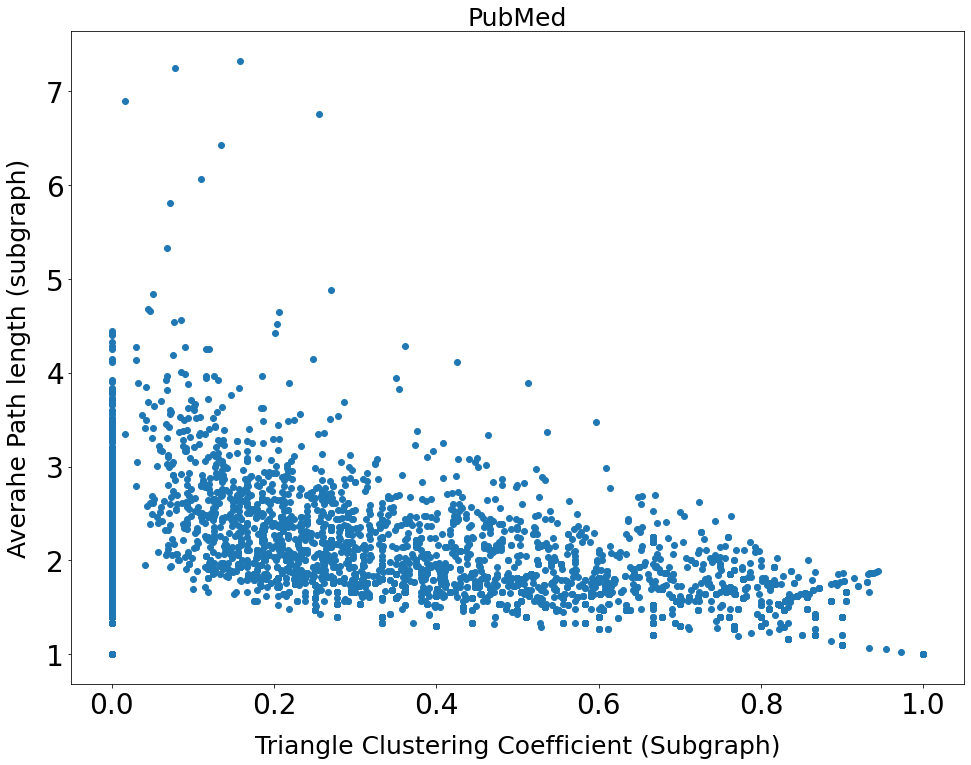

In [29]:
#x = [0.017, 0.14, 0, 0, 0, 0.071, 0, 0.067, 0, 0.09]
#y = [6.92, 7.32, 3.43, 4.4, 3.79, 3.65, 2.83, 3.92, 2.92, 2.61]
plt.figure(figsize = (16, 12))
x = avg_subg_clust_dic.values()
y = avg_subg_path_dic.values()
#labels = range(1, 11, 1)
plt.scatter(x, y)
#plt.axvline(x=0.4, color = 'red') #x轴垂直线，x= 0.3
#plt.axhline(y=3, color = 'red') #x轴水平线，y= 3
#plt.axvline(x=0.2, color = 'red') #x轴垂直线，x= 0.3
#plt.axhline(y=5, color = 'red') #x轴水平线，y= 3
plt.title('PubMed', size = 25, color = 'black')
plt.xlabel('Triangle Clustering Coefficient (Subgraph)', size = 25, labelpad = 15, color = 'black')
plt.ylabel('Averahe Path Length (subgraph)', size = 25, labelpad = 15, color = 'black')
plt.xticks(fontsize = 28)
plt.yticks(fontsize = 28)
plt.show()

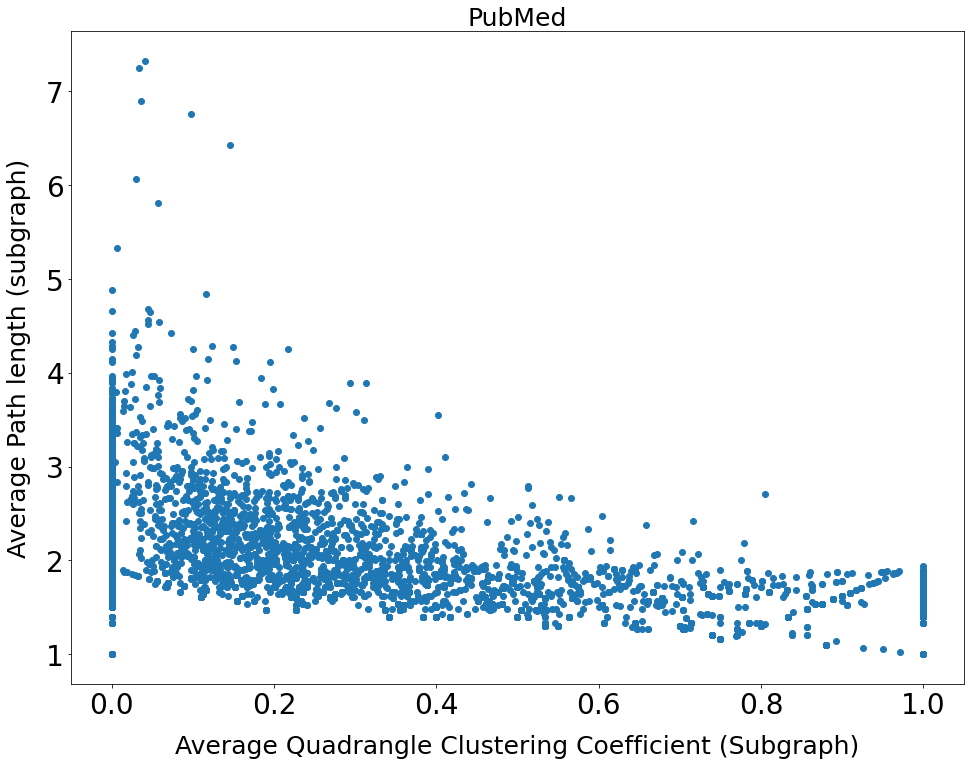

In [30]:
#x = [0.017, 0.14, 0, 0, 0, 0.071, 0, 0.067, 0, 0.09]
#y = [6.92, 7.32, 3.43, 4.4, 3.79, 3.65, 2.83, 3.92, 2.92, 2.61]
plt.figure(figsize = (16, 12))
x = avg_subg_quadclust_dic.values()
y = avg_subg_path_dic.values()
#labels = range(1, 11, 1)
plt.scatter(x, y)
#plt.axvline(x=0.4, color = 'red') #x轴垂直线，x= 0.3
#plt.axhline(y=3, color = 'red') #x轴水平线，y= 3
#plt.axvline(x=0.2, color = 'red') #x轴垂直线，x= 0.3
#plt.axhline(y=5, color = 'red') #x轴水平线，y= 3
plt.title('PubMed', size = 25, color = 'black')
plt.xlabel('Average Quadrangle Clustering Coefficient (Subgraph)', size = 25, labelpad = 15, color = 'black')
plt.ylabel('Average Path Length (subgraph)', size = 25, labelpad = 15, color = 'black')
plt.xticks(fontsize = 28)
plt.yticks(fontsize = 28)
plt.show()

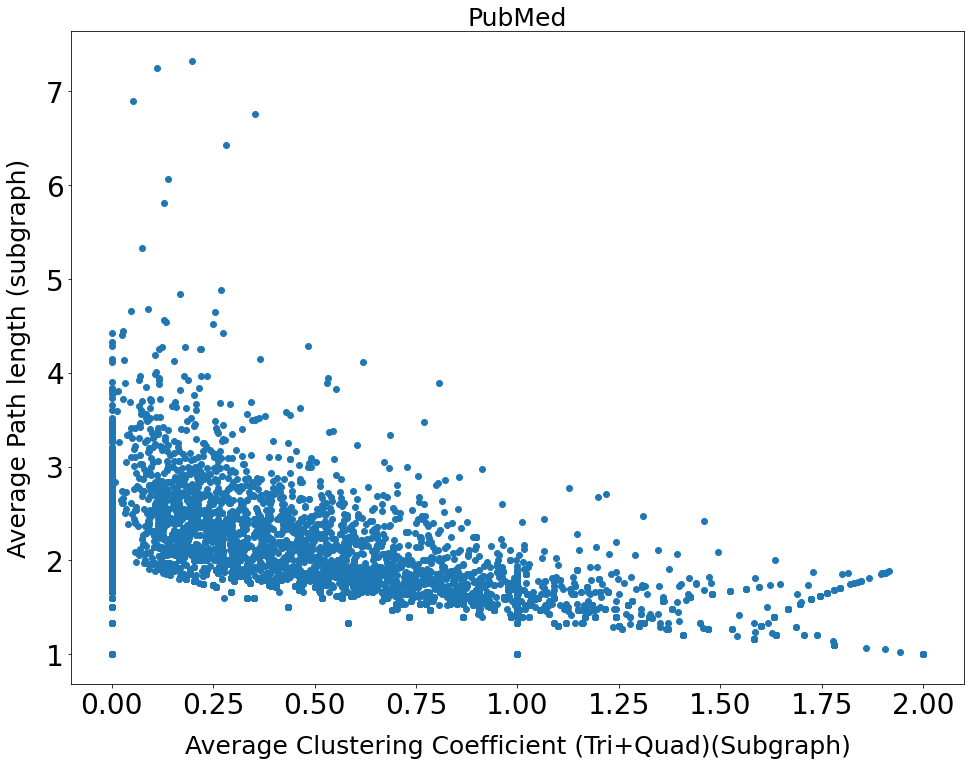

In [31]:
#x = [0.017, 0.14, 0, 0, 0, 0.071, 0, 0.067, 0, 0.09]
#y = [6.92, 7.32, 3.43, 4.4, 3.79, 3.65, 2.83, 3.92, 2.92, 2.61]
plt.figure(figsize = (16, 12))
x = subs['Average clustering coefficient (tri+quad)'].values
y = avg_subg_path_dic.values()
#labels = range(1, 11, 1)
plt.scatter(x, y)
#plt.axvline(x=0.4, color = 'red') #x轴垂直线，x= 0.3
#plt.axhline(y=3, color = 'red') #x轴水平线，y= 3
#plt.axvline(x=0.2, color = 'red') #x轴垂直线，x= 0.3
#plt.axhline(y=5, color = 'red') #x轴水平线，y= 3
plt.title('PubMed', size = 25, color = 'black')
plt.xlabel('Average Clustering Coefficient (Tri+Quad)(Subgraph)', size = 25, labelpad = 15, color = 'black')
plt.ylabel('Average Path Length (subgraph)', size = 25, labelpad = 15, color = 'black')
plt.xticks(fontsize = 28)
plt.yticks(fontsize = 28)
plt.show()

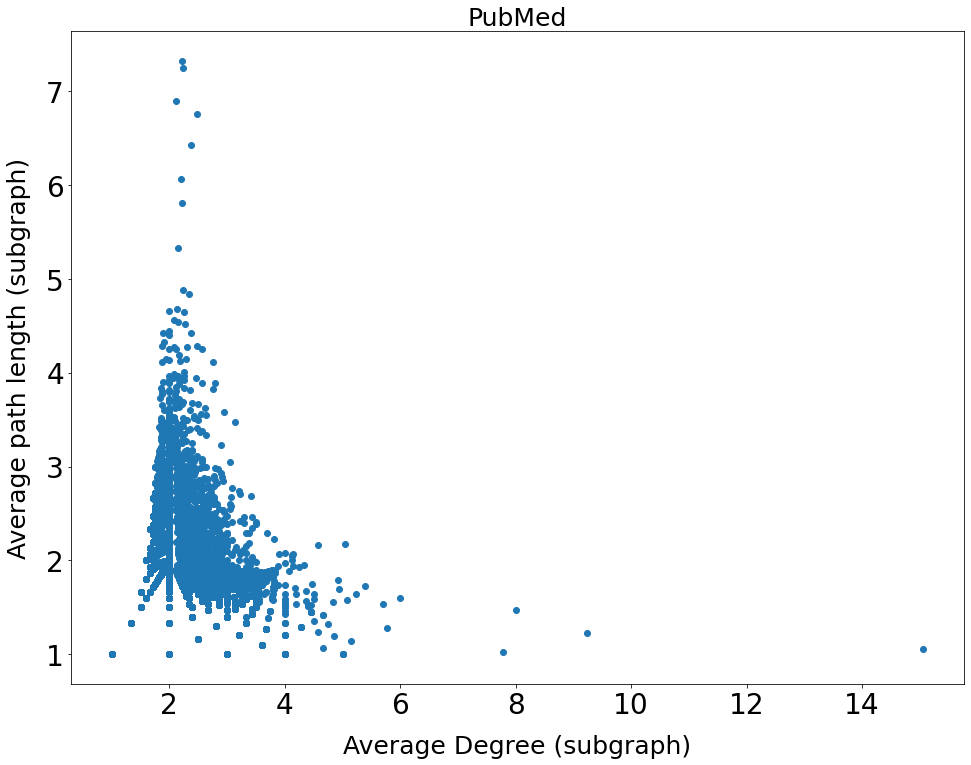

In [32]:
#x = [0.017, 0.14, 0, 0, 0, 0.071, 0, 0.067, 0, 0.09]
#y = [6.92, 7.32, 3.43, 4.4, 3.79, 3.65, 2.83, 3.92, 2.92, 2.61]
#x = avg_subg_clust_dic.values()
plt.figure(figsize = (16, 12))
x = avg_subg_degree_dic.values()
y = avg_subg_path_dic.values()
#labels = range(1, 11, 1)
plt.scatter(x, y)
#plt.axvline(x=0.4, color = 'red') #x轴垂直线，x= 0.3
#plt.axhline(y=3, color = 'red') #x轴水平线，y= 3
#plt.axvline(x=0.2, color = 'red') #x轴垂直线，x= 0.3
#plt.axhline(y=5, color = 'red') #x轴水平线，y= 3
plt.xlabel('Average Degree (subgraph)', size = 25, labelpad = 15, color = 'black')
plt.ylabel('Average path length (subgraph)', size = 25, labelpad = 15, color = 'black')
plt.xticks(fontsize = 28)
plt.yticks(fontsize = 28)
plt.title('PubMed', size = 25, color = 'black')
plt.show()

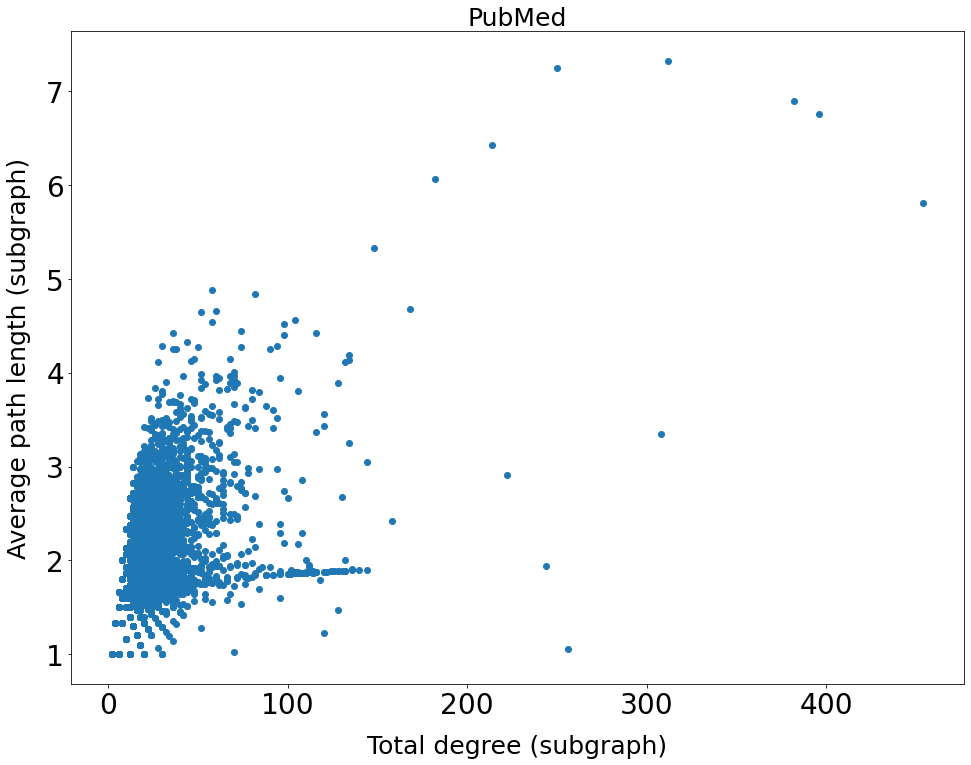

In [33]:
#x = [0.017, 0.14, 0, 0, 0, 0.071, 0, 0.067, 0, 0.09]
#y = [6.92, 7.32, 3.43, 4.4, 3.79, 3.65, 2.83, 3.92, 2.92, 2.61]
#x = avg_subg_clust_dic.values()
plt.figure(figsize = (16, 12))
x = subg_degree_dic.values()
y = avg_subg_path_dic.values()
#labels = range(1, 11, 1)
plt.scatter(x, y)
#plt.axvline(x=0.4, color = 'red') #x轴垂直线，x= 0.3
#plt.axhline(y=3, color = 'red') #x轴水平线，y= 3
#plt.axvline(x=0.2, color = 'red') #x轴垂直线，x= 0.3
#plt.axhline(y=5, color = 'red') #x轴水平线，y= 3
plt.title('PubMed', size = 25, color = 'black')
plt.xlabel('Total degree (subgraph)', size = 25, labelpad = 15, color = 'black')
plt.ylabel('Average path length (subgraph)', size = 25, labelpad = 15, color = 'black')
plt.xticks(fontsize = 28)
plt.yticks(fontsize = 28)
plt.show()

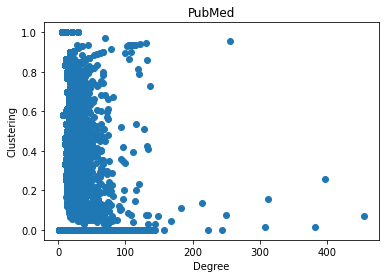

In [44]:
#x = [0.017, 0.14, 0, 0, 0, 0.071, 0, 0.067, 0, 0.09]
#y = [6.92, 7.32, 3.43, 4.4, 3.79, 3.65, 2.83, 3.92, 2.92, 2.61]
#x = avg_subg_clust_dic.values()
x = subg_degree_dic.values()
y = avg_subg_clust_dic.values()
#y = avg_subg_path_dic.values()
#labels = range(1, 11, 1)
plt.scatter(x, y)
#plt.axvline(x=0.4, color = 'red') #x轴垂直线，x= 0.3
#plt.axhline(y=3, color = 'red') #x轴水平线，y= 3
#plt.axvline(x=0.2, color = 'red') #x轴垂直线，x= 0.3
#plt.axhline(y=5, color = 'red') #x轴水平线，y= 3
plt.title('PubMed')
plt.xlabel('Degree')
plt.ylabel('Clustering')
plt.show()

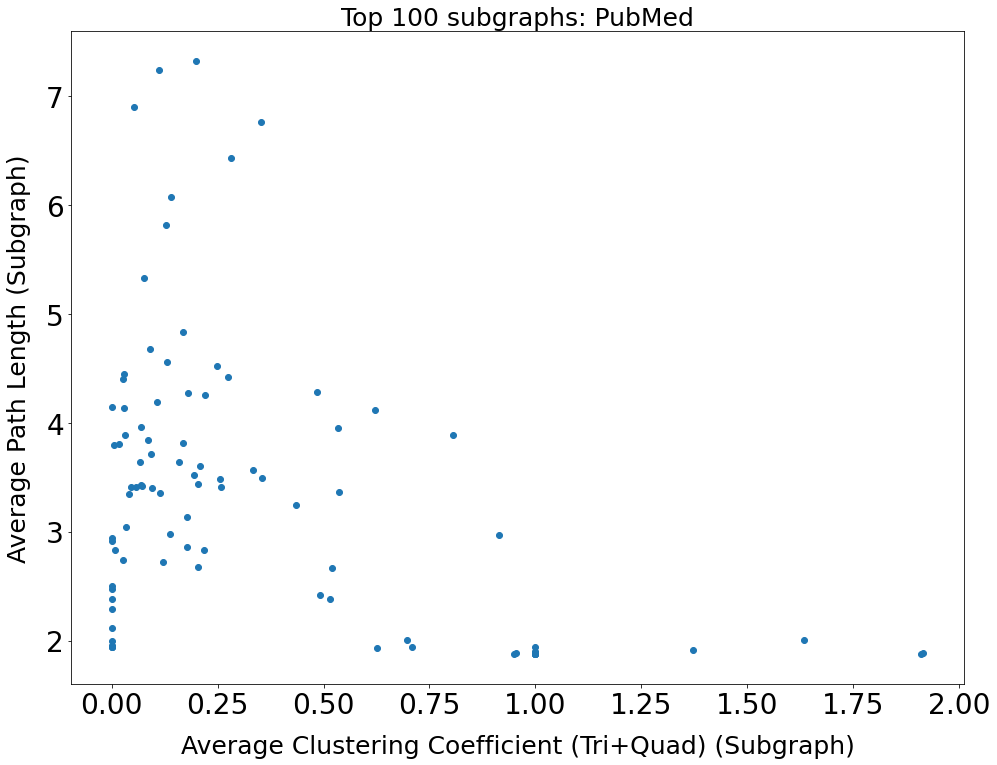

In [37]:
#x = [0.017, 0.14, 0, 0, 0, 0.071, 0, 0.067, 0, 0.09]
#y = [6.92, 7.32, 3.43, 4.4, 3.79, 3.65, 2.83, 3.92, 2.92, 2.61]
#x = list(avg_subg_quadclust_dic1.values())[:10]
plt.figure(figsize = (16, 12))
x = subs['Average clustering coefficient (tri+quad)'].values[:100]
y = list(avg_subg_path_dic.values())[:100]
#labels = range(1, 11, 1)
plt.scatter(x, y)
plt.title('Top 100 subgraphs: PubMed', fontsize = 25, color = 'black')
plt.xlabel('Average Clustering Coefficient (Tri+Quad) (Subgraph)', fontsize = 25, labelpad = 15, color = 'black')
plt.ylabel('Average Path Length (Subgraph)', fontsize = 25, labelpad = 15, color = 'black')
plt.xticks(fontsize = 28)
plt.yticks(fontsize = 28)
plt.show()

### Subgraph Distribution

In [6]:
all_wcc = sorted(nx.connected_components(graph), key = len, reverse = True)
wcc_sizes = pd.Series([len(wcc) for wcc in all_wcc])
wcc_sizes
print(f'{len(all_wcc)} subgraphs in total')
wcc_sizes.value_counts().sort_index(ascending = False)   

688875 subgraphs in total


204         1
181         1
160         1
141         1
140         1
        ...  
6        6197
5       13837
4       33029
3      122936
2      503758
Length: 64, dtype: int64

FileNotFoundError: [Errno 2] No such file or directory: '/Users/shuangwang/Desktop/PhD Projects/Research Commentary/Interesting_useful/Graphs/PubMed_Subgraph_distribution.jpg'

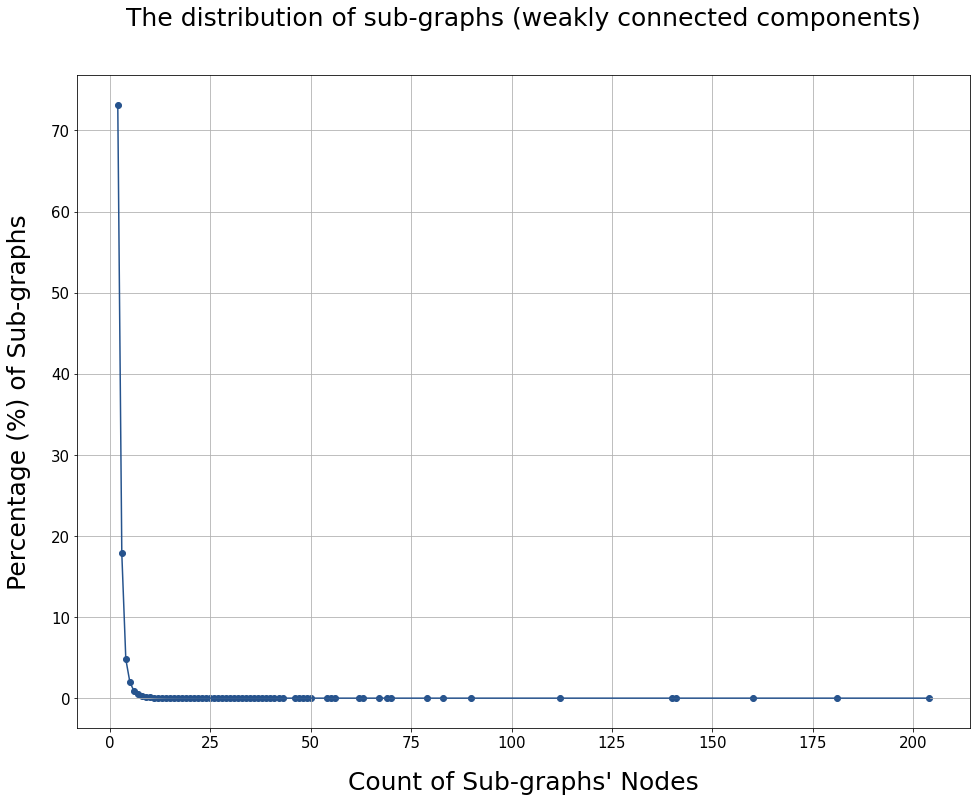

In [22]:
all_wcc = sorted(nx.connected_components(graph), key = len, reverse = True)
wcc_sizes = pd.Series([len(wcc) for wcc in all_wcc])
wcc_seq = wcc_sizes.value_counts().sort_index().index
wcc_counts = list((wcc_sizes.value_counts().sort_index()/len(all_wcc))*100)
#wcc_counts
#wcc_counts/8938
plt.figure(figsize = (16, 12))
plt.scatter(wcc_seq, wcc_counts, color = '#26538d')
plt.plot(wcc_seq, wcc_counts, color = '#26538d')#label = 'Corticosteroid', color = '#26538d'
plt.title("The distribution of sub-graphs (weakly connected components)", size = 25, pad = 50) #pad: space between title&plot
plt.grid()
plt.xlabel("Count of Sub-graphs' Nodes", size = 25, labelpad = 20)
plt.ylabel("Percentage (%) of Sub-graphs", size = 25, labelpad = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
#plt.legend()
#plt.savefig('/Users/shuangwang/Desktop/PhD Projects/Research Commentary/Interesting_useful/Graphs/PubMed_Subgraph_distribution.jpg')